In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Simulacion 1 (RC)

Usando la 2da Ley de Kirchhoff(Ley de mallas) 
\begin{equation}
\frac{dq}{dt}R + \frac{q}{c}=0
\end{equation}
Se obtiene la ecuacion de la corriente en función del tiempo tomando en cuenta la condicion inicial q(0)/C= 5[V]
\begin{equation}
i(t)= -\frac{V}{R} e^{-t/CR}
\end{equation}
Teniendo en cuenta que $5\tau$ se considera un tiempo considerable para que $i(5\tau)=0$ y $\tau$ lo definimos como:
\begin{equation}
\tau= CR
\end{equation}

In [11]:
#hacer esto otra vez para distintos valores de r (considerar solo r=200 en este caso despues justificamos que se sigue el mismo procedimiento)
C=10*(10**(-9))
R=200
print('tau teórico =', R*C,'[s]') 
print('tau estimado= 1.6e-06 [s]')# estimacion grafico=0.0000016con ( 4 espacios de  2[micro segundos])

tau teórico = 2e-06 [s]
tau estimado= 1.6e-06 [s]


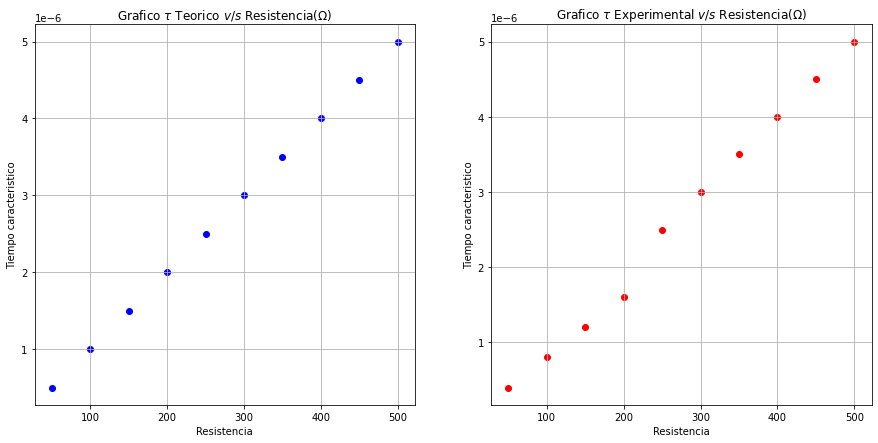

In [12]:
#Estudiaremos el comportamiento de $\tau$ para distintos valores de r, haciendo dos graficos ( uno t v/s r de forma teorica y el otro de forma experimental)
def tau(R):
    return (10*(10**(-9)))*R
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
taut=[]
for i in range(50,501,50):
    taut.append(tau(i))
    plt.scatter(i,tau(i),c='blue')
    plt.xlabel('Resistencia')
    plt.ylabel('Tiempo caracteristico')
    plt.title('Grafico $\\tau$ Teorico $v/s$ Resistencia($\Omega$)' )
    plt.grid(True)

plt.subplot(1,2,2)
r=np.array([50,100,150,200,250,300,350,400,450,500])
taue=np.array([0.4e-6,0.8e-6,1.2e-6,1.6e-6,2.5e-6,3e-6,3.5e-6,4e-6,4.5e-6,5e-6]) # tiempo caracteristico experimental
plt.scatter(r,taue,c='r')
plt.xlabel('Resistencia')
plt.ylabel('Tiempo caracteristico')
plt.title('Grafico $\\tau$ Experimental $v/s$ Resistencia($\Omega$)' )
plt.grid(True)
plt.savefig('taurc.pdf')

In [13]:
#Diferencia entre valor teorico y valor estimado
taut=np.array(taut)
diferenciarc=taut-taue
print(diferenciarc)

[1.e-07 2.e-07 3.e-07 4.e-07 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00]


In [14]:
#error porcentual
T= taut**(-1)
errorp= diferenciarc*T
print(errorp)

[0.2 0.2 0.2 0.2 0.  0.  0.  0.  0.  0. ]


### Impedancia Capacitiva XC
Se define como:
\begin{equation}
X_C = \frac{V_C}{V_R}R = \frac{1}{\omega C} = \frac{1}{2\pi f C}
\end{equation}

In [15]:
C= 1e-7
R= 1000
f=np.array([1.0,2.0,4.0,8.0])
fm= f**(-1)
def xc(f):
    return 1/(2*(np.pi)*f*C*1000)
XC=[]
for i in f :
    XC.append(xc(f))
XC=np.array(XC[0])
#Valor teoricos de impedacia capacitiva para distintas frecuencias
print(XC)

[1591.54943092  795.77471546  397.88735773  198.94367886]


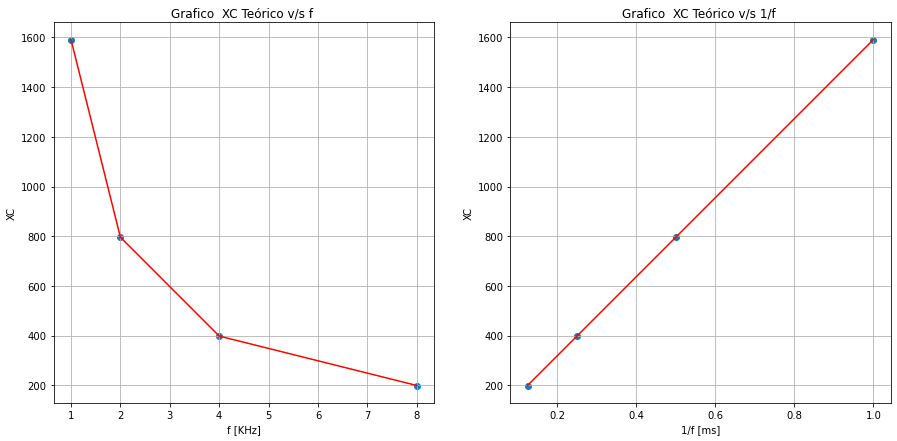

In [16]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(f,XC)
plt.plot(f,XC,c='r')
plt.title('Grafico  XC Teórico v/s f ')
plt.ylabel('XC')
plt.xlabel('f [KHz]')
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(fm,XC)
plt.plot(fm,XC,c='r')
plt.title('Grafico  XC Teórico v/s 1/f ')
plt.ylabel('XC')
plt.xlabel('1/f [ms]')
plt.grid(True)
plt.savefig('xcfteorico.pdf')

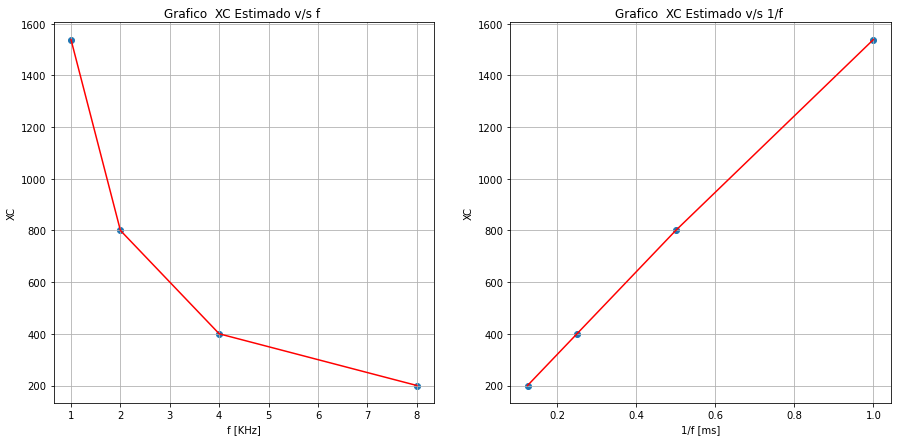

In [17]:
#XC estimado
xces=np.array([1538.5,800.0,400.0,200.0])
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.scatter(f,xces)
plt.plot(f,xces,c='r')
plt.title('Grafico  XC Estimado v/s f ')
plt.ylabel('XC')
plt.xlabel('f [KHz]')
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(fm,xces)
plt.plot(fm,xces,c='r')
plt.title('Grafico  XC Estimado v/s 1/f ')
plt.ylabel('XC')
plt.xlabel('1/f [ms]')
plt.grid(True)
plt.savefig('xcfestimado.pdf')

# Simulación 2 (RL)

Usando la 2da Ley de Kirchhoff( Ley de mallas)
\begin{equation}
L\frac{di}{dt} + iR=0
\end{equation}
Se obtiene la ecuación de la corriente en funcion del tiempo:
\begin{equation}
i(t)=Ie^{-tR/L}
\end{equation}
Tenemos en cuenta que 5$\tau$ se considera un tiempo relativamente grande para considerar que $i(5\tau)=0$ donde $\tau$ se define como:
    \begin{equation}
    \tau=\frac{L}{R}
    \end{equation}

In [18]:
R=200
L=9*(10**(-3))
print('tau teorico=',L/R,'[s]') 
print('tau estimado= 4e-05[s]')  #estimacion grafico=0.00004 con (4 espacios de 0.05[ms])

tau teorico= 4.5e-05 [s]
tau estimado= 4e-05[s]


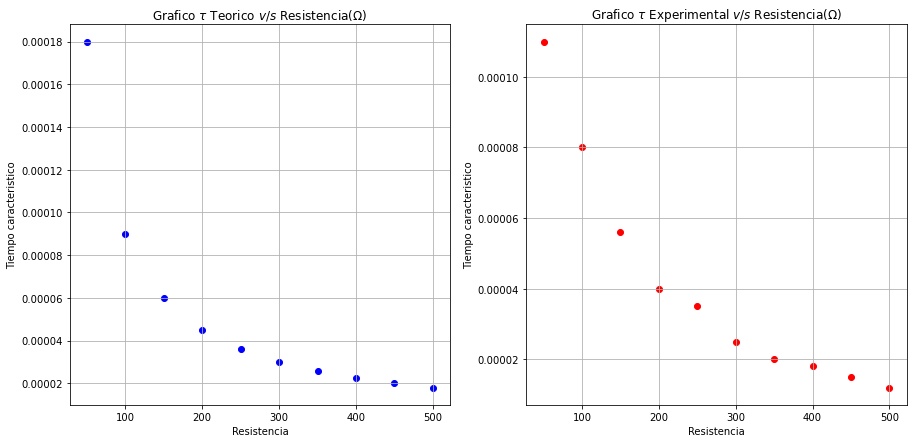

In [19]:
#Estudiaremos el comportamiento de $\tau$ para distintos valores de r, haciendo dos graficos ( uno t v/s r de forma teorica y el otro de forma experimental)
def tau(R):
    return (9*(10**(-3)))/R
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
taut=[]
for i in range(50,501,50):
    taut.append(tau(i))
    plt.scatter(i,tau(i),c='blue')
    plt.xlabel('Resistencia')
    plt.ylabel('Tiempo caracteristico')
    plt.title('Grafico $\\tau$ Teorico $v/s$ Resistencia($\Omega$)' )
    plt.grid(True)
plt.subplot(1,2,2)
r=np.array([50,100,150,200,250,300,350,400,450,500])
taue=np.array([11e-5,8e-5,5.6e-5,4e-5,3.5e-5,2.5e-5,2e-5,1.8e-5,1.5e-5,1.2e-5]) # tiempo caracteristico experimental
plt.scatter(r,taue,c='r')
plt.xlabel('Resistencia')
plt.ylabel('Tiempo caracteristico')
plt.title('Grafico $\\tau$ Experimental $v/s$ Resistencia($\Omega$)' )
plt.grid(True)
plt.savefig('taurl.pdf')

In [20]:
#Diferencia entre valor teorico y valor estimado
taut=np.array(taut)
diferenciarl=np.abs(taut-taue)
print(diferenciarl)

[7.00000000e-05 1.00000000e-05 4.00000000e-06 5.00000000e-06
 1.00000000e-06 5.00000000e-06 5.71428571e-06 4.50000000e-06
 5.00000000e-06 6.00000000e-06]


In [21]:
#error porcentual
T= taut**(-1)
errorp= diferenciarl*T
print(errorp)

[0.38888889 0.11111111 0.06666667 0.11111111 0.02777778 0.16666667
 0.22222222 0.2        0.25       0.33333333]


### Impedancia inductiva XL
Se define como:
\begin{equation}
X_L = \frac{V_L}{V_R}R = \omega L = 2\pi f L
\end{equation}

In [22]:
L= 9e-3
R= 1000
f=np.array([10.0,20.0,30.0,40.0,50.0])
def xl(f):
    return (2*(np.pi)*f*L*1000)
XL=[]
for i in f :
    XL.append(xl(f))
XL=np.array(XL[0])
#Valor teóricos de impedacia inductiva para distintas frecuencias
print(XL)

[ 565.48667765 1130.97335529 1696.46003294 2261.94671058 2827.43338823]


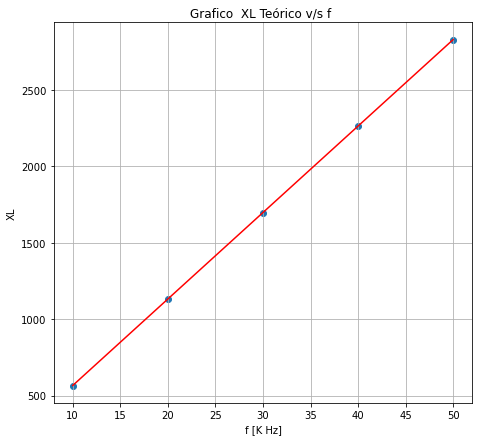

In [23]:
#XC Teórico
plt.figure(figsize=(7.5,7))
plt.scatter(f,XL)
plt.plot(f,XL,c='r')
plt.title('Grafico  XL Teórico v/s f ')
plt.ylabel('XL')
plt.xlabel('f [K Hz]')
plt.grid(True)
plt.savefig('xlteorico.pdf')

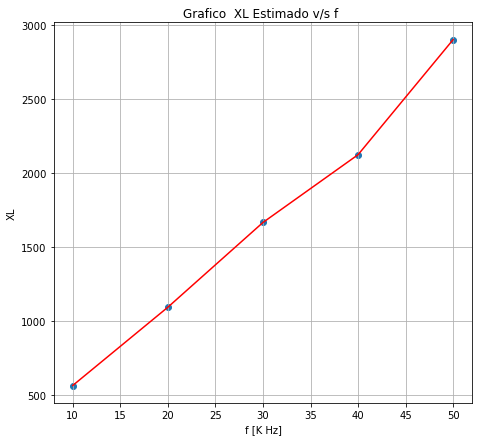

In [24]:
#XL estimado
xles=([564.7,1093.8,1666.7,2125.0,2903.2])
plt.figure(figsize=(7.5,7))
plt.scatter(f,xles)
plt.plot(f,xles,c='r')
plt.title('Grafico  XL Estimado v/s f ')
plt.ylabel('XL')
plt.xlabel('f [K Hz]')
plt.grid(True)
plt.savefig('xlestimado.pdf')

# Simulacion 3 (RLC)

Usando la 2da Ley de Kirchhoff ( Ley de mallas )
\begin{equation}
 \frac{d^2 i}{dt^2} + \frac{R}{L}\frac{di}{dt} + \frac{1}{CL}i =0
\end{equation}
Se obtiene la la ecuación de la corriente en función del tiempo:
\begin{equation}
i(t)=Ae^{\lambda_1 t} + Be^{\lambda_2 t} 
\end{equation}
donde:
\begin{equation}
\lambda_j = -\frac{R}{2L} \pm \sqrt{ \frac{R^2}{4L^2} - \frac{1}{CL}} = -\alpha \pm \sqrt{ \alpha^2 - w_0^2} 
\end{equation}
Dado los datos propuestos nos encontramos con el caso subamortiguado de esta solución, es decir, cuando $ w_0 > \alpha $
\begin{equation}
i(t)= e^{\frac{-tR}{2L}}\left( K_1 cos(wt) + K_2 sin(wt)\right)
\end{equation}
Donde $w$ es la frecuencia angular y se relaciona con la frecuencia de oscilación de la forma:
$$ w= 2\pi f $$

In [107]:
#Cálculo de frecuencia de oscilación 
def w(R,L,C): #frecuencia angular
    return (np.sqrt(4/(C*L)-(R/L)**2))/2

In [108]:
R=200
L=9*(10**(-3))
C=10*(10**(-9))
w1=w(R,L,C)
f=w1/(2*np.pi) #Frecuencia de oscilación teorica
print('Frecuencia de oscilación teórica=',f,'[Hz]')
print('Frecuencia de oscilación estimada= 16666.7[Hz]')  # estimacion de Frecuencia de oscilación= 16666.7 con(10[us] y 6 espacios)

Frecuencia de oscilación teórica= 16682.941446694254 [Hz]
Frecuencia de oscilación estimada= 16666.7[Hz]


### Frecuencia de resonancia 


La frecuencia de resonancia del circuito esta dada por:
\begin{equation}
f_0 = \frac{1}{2\pi \sqrt{LC}}
\end{equation}
Donde $w=\frac{1}{\sqrt{LC}}$ es la frecuencia de resonancia angular

In [9]:
L=9e-3
C=0.01e-6
R=1e3
#Calculamos la frecuencia de resonancia dado los componentes del circuito
w = 1/(L*C)**(0.5)
f_0 = w/(2*(np.pi)) 
print('Frecuencia de resonancia=',int(f_0),'$ \\approx 1.68 [ KHz]$')

Frecuencia de resonancia= 16776 $ \approx 1.68 [ KHz]$
